# Double Pendulum using Euler-Lagrange equations

This notebook uses Euler-Lagrange equations to solve the double pendulum problem.

## Euler-Lagrange equation

For a simple pendulum, the Lagrangian with generalized coordinate $\phi$ is

$\begin{align}
  \mathcal{L} = \frac12 m L^2 \dot\phi^2 - mgL(1 - \cos\phi)
\end{align}$

The Euler-Lagrange equation is

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi} = \frac{\partial\mathcal L}{\partial\phi}
 \quad\Longrightarrow\quad
 m L^2 \ddot \phi = -mgL\sin\phi
  \ \mbox{or}\ \ddot\phi = - \omega_0^2\sin\phi = 0
  \;.
\end{align}$

## Hamilton's equations

The generalized momentum corresponding to $\phi$ is

$\begin{align}
   \frac{\partial\mathcal{L}}{\partial \dot\phi} = m L^2 \dot\phi \equiv p_\phi
   \;.
\end{align}$

We can invert this equation to find $\dot\phi = p_\phi / m L^2$.
Constructing the Hamiltonian by Legendre transformation we find 

$\begin{align}
  \mathcal{H} &= \dot\phi p_\phi  - \mathcal{L} \\
              &= \frac{p_\phi^2}{m L^2} - \frac12 m L^2 \dot\phi^2 + mgL(1 - \cos\phi) \\
              &= \frac{p_\phi^2}{2 m L^2} + mgL(1 - \cos\phi)
              \;.
\end{align}$

Thus $\mathcal{H}$ is simply $T + V$.  Hamilton's equations are

$\begin{align}
  \dot\phi &= \frac{\partial\mathcal{H}}{\partial p_\phi} = \frac{p_\phi}{m L^2} \\
  \dot p_\phi &= -\frac{\partial\mathcal{H}}{\partial \phi} = -mgL \sin\phi 
  \;.
\end{align}$

In [1]:
from IPython.display import Image
Image(url='https://upload.wikipedia.org/wikipedia/commons/7/78/Double-Pendulum.svg')

## Lagrangian for a Double Pendulum

The Potential Energy of the double pendulum is given by:

$ U(\phi_{1}, \phi_{2}) = (m_1 + m_2)gL_{1}(1 - \cos{\phi_{1}}) + m_{2}gL_{2}(1 - \cos{\phi_{2}}) $

The Kinetic Energy of the double pendulum is given by:

$ T = \frac12 (m_1 + m_2)L_{1}^2 \dot\phi_{1}^{2} + m_{2}L_{1}L_{2}\dot\phi_{1}\dot\phi_{2}\cos{(\phi_{1} - \phi_{2})} + \frac12 m_{2}L_{2}^2\dot\phi_{2}^2 $

The Lagrangian is given by:

$ \mathcal{L} = T - U $

$ \therefore \mathcal{L} = \frac12 (m_1 + m_2)L_{1}^2 \dot\phi_{1}^{2} + m_{2}L_{1}L_{2}\dot\phi_{1}\dot\phi_{2}\cos{(\phi_{1} - \phi_{2})} + \frac12 m_{2}L_{2}^2\dot\phi_{2}^2 - (m_1 + m_2)gL_{1}(1 - \cos{\phi_{1}}) - m_{2}gL_{2}(1 - \cos{\phi_{2}}) $

We can now use the Euler-Lagrange equations to get:

$$ \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_{1}} = \frac{\partial\mathcal L}{\partial\phi_{1}} $$

$$ (m_{1} + m_{2})L_{1}\ddot\phi_{1} + m_{2}L_{2}\ddot\phi_{2} \cos(\phi_{1} - \phi_{2}) + 2 m_{2}L_{2}\dot\phi_[1}\dot\phi_{2} \sin(\phi_{1} - \phi_{2}) - m_{2}L_{2}\dot\phi_{2}^{2} \sin(\phi_{1} - \phi_{2}) + (m_{1} + m_{2}) g \sin(\phi_{1}) = 0 $$


and

$$\frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_{2}} = \frac{\partial\mathcal L}{\partial\phi_{2}}$$

$$ m_2L_2\ddot\phi_2 + m_1L_1\ddot\phi_1 \cos(\phi_1 - \phi_2) - m_1L_1\dot\phi^2 \sin(\phi_1 - \phi_2) + m_2gL_2 \sin \phi_2 = 0 $$

We can then represent these equations as:



In [2]:
%matplotlib inline

In [3]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [4]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [5]:
class LagrangianDoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L : float
        lengths of the strings
    g : float
        gravitational acceleration at the earth's surface
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    mass : float
        masses of pendulums

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
        
    def calc_L(y):
        phi1, d_phi1, phi2, d_phi2 = y.T
        U = (m1+m2)*g*L1*(1. - np.cos(phi1)) + m2*g*L2*(1. - np.cos(phi2))
        T = 0.5*(m1+m2)*(L1**2)*(d_phi1**2) + m2*L1*L2*d_phi1*d_phi2*np.cos(phi1 - phi2) + 0.5*m2*(L2**2)(d_phi2**2)
        return (T - U)
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi1/dt d^2phi2/dt^2 dphi2/dt d^2phi2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi1(t) and y[1] = dphi1/dt
                                      y[2] = phi2(t) and y[3] = dphi2/dt
            
        Returns
        -------
        
        """
        phi1, d_phi1, phi2, d_phi2 = y
        
        z1 = d_phi1
        z2 = d_phi2
        
        denom1 = L1*(m1*(np.cos(phi1 - phi2)**2) - (m1+m2))
        d_z1 = (2.*m2*L2*z1*z2*np.sin(phi1 - phi2) - m2*L2*(z2**2)*np.sin(phi1 - phi2) + (m1+m2)*g*L2*np.sin(phi1) \
        - np.cos(phi1 - phi2)*(m2*g*L2*np.sin(phi2) - m1*L1*(z1**2)*np.sin(phi1 - phi2))) / denom1
        
        denom2 = m2*L2*(m2 + m1*(np.sin(phi1 - phi2)**2))
        d_z2 = (2.*m2*L2*z1*z2*np.sin(phi1 -phi2) - m2*L2*(z2**2)*np.sin(phi1 -phi2) + (m1+m2)*g*L2*np.sin(phi1) \
               -(m1+m2)*(m2*g*L2*np.sin(phi2) - m1*L1*(z1**2)*np.sin(phi1 - phi2))) / denom2
        
        return z1, d_z1, z2, d_z2
    
    def solve_ode(self, t_pts, phi1_0, d_phi1_0, phi2_0, d_phi2_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, d_phi1_0, phi2_0, d_phi2_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, d_phi, phi2, d_phi2 = solution.y

        return phi1, d_phi, phi2, d_phi2
    

In [6]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [7]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make simple pendulum plots 

In [8]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1. 

# Instantiate a pendulum 
dp1 = LagrangianDoublePendulum(L1, L2, m1, m2, g)


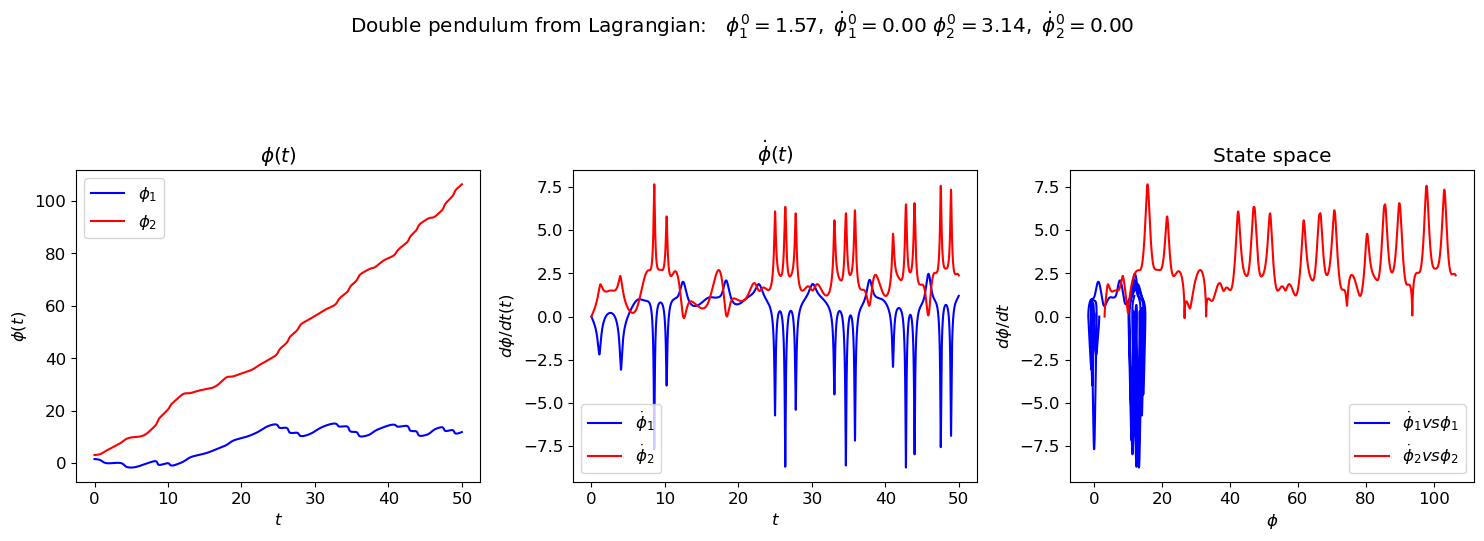

In [9]:
# initial conditions for large angles
phi1_0 = np.pi / 2.
d_phi1_0 = 0.
phi2_0 = np.pi
d_phi2_0 = 0.
phi1, d_phi1, phi2, d_phi2 = dp1.solve_ode(t_pts, phi1_0, d_phi1_0, phi2_0, d_phi2_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\phi_1^0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi_1^0 = {d_phi1_0:.2f}$' + \
                rf' $\phi_2^0 = {phi2_0:.2f},$' + \
                rf' $\dot\phi_2^0 = {d_phi2_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=r'$\phi_1$', 
            title=r'$\phi(t)$', 
            ax=ax_a)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=r'$\phi_2$', 
            title=r'$\phi(t)$', 
            ax=ax_a)
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], d_phi1[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='blue',
            label=r'$\dot\phi_1$', 
            title=r'$\dot\phi(t)$', 
            ax=ax_b)  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], d_phi2[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='red',
            label=r'$\dot\phi_2$', 
            title=r'$\dot\phi(t)$', 
            ax=ax_b)

# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], d_phi1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=r'$\dot\phi_1 vs \phi_1$', 
            title='State space', 
            ax=ax_c)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2[start : stop], d_phi2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=r'$\dot\phi_2 vs \phi_2$', 
            title='State space', 
            ax=ax_c)

fig.tight_layout()
fig.savefig('Double_Pendulum_Lagrange.png', bbox_inches='tight')  

Now trying the power spectrum, plotting only positive frequencies and cutting off the lower peaks:

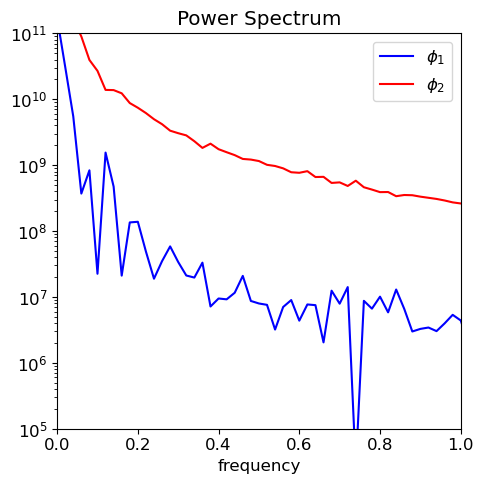

In [10]:
start, stop = start_stop_indices(t_pts, t_start, t_end)    
signal_1 = phi1[start:stop]
signal_2 = phi2[start:stop]
power_spectrum_1 = np.abs(np.fft.fft(signal_1))**2
power_spectrum_2 = np.abs(np.fft.fft(signal_2))**2
freqs_1 = np.fft.fftfreq(signal_1.size, delta_t)
freqs_2 = np.fft.fftfreq(signal_2.size, delta_t)
idx_1 = np.argsort(freqs_1)
idx_2 = np.argsort(freqs_2)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs_1[idx_1], power_spectrum_1[idx_1], color='blue', label=r'$\phi_1$')
ax_ps.semilogy(freqs_2[idx_2], power_spectrum_2[idx_2], color='red', label=r'$\phi_2$')
ax_ps.set_xlim(0, 1.)
ax_ps.set_ylim(1.e5, 1.e11)
ax_ps.set_xlabel('frequency')
ax_ps.set_title('Power Spectrum')
ax_ps.legend()

fig_ps.tight_layout()
fig_ps.savefig("Double_Pendulum_Power_Spectrum.png", bbox_inches='tight')

## Analyzing Power Spectrum

By looking at the power spectrum, we can see that there is a response in almost every frequency, which indicates that the system is in chaos for the initial conditions:

$$ \phi_{1}^0 = \frac{\pi}{2} \\
    \phi_{2}^0 = \pi $$
    
which are beyond the small angle approximation.